# Les principes de l'apprentissage machine

Ce cours est inspiré du chapitre 1 du livre d'Aurélien Géron: "Hands-On Machine Learning with Scikit-Learn and TensorFlow". Disponible sur amazon (en anglais et en français) pour un tout petit prix. Et [ici](https://github.com/ageron/handson-ml) se trouve le projet original sur github.

* Lisez attentivement ce texte
* Les partie en anglais sont les partie du livre que j'ai laissé inchangée. Elle sont "pour la culture"
* Ne lisez pas les codes, on les analysera en détails dans un prochain TP


In [0]:
"""It is not necessary to re-rerun this cells after a %reset"""

"to load assets on the server (if it was not already done)"
import os
if not os.path.exists("assets_ml"):
  !git clone https://github.com/vincentvigon/assets_ml

"checking: directories 'dataframe','img'  must appear"
!ls assets_ml

dataframe img


In [0]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

assert os.path.exists("assets_ml"), "please import assets via git"

## Introduction




### Qu'est-ce que le machine learning?





Imaginez que vous voulez faire un filtre de spam. Technique classique:  

* 1/ vous observez des spams et en notez les particularités : des mots qui reviennent souvent, des mises en pages tape à l'oeil. 
* 2/ vous implantez des régles qui repérent les particularités. 
* 3/ vous testez votre filtre, observez les spams non détectés, puis recommencer les étapes 2 et 3 jusqu'à satisfaction.  


Le problème de base étant non trivial, votre programme finira par être une longue liste de règles complexes, difficiles à maintenir. 

A l'inverse, un filtre de spam basé sur le machine learning va apprendre automatiquement les fréquences des mots des spam et des non-spam. Une formule simple (exemple linéaire) mais avec beaucoup de paramétres "appris" automatiquement va transformer ces fréquences en une réponse binaire: "spam / non-spam".


traditionnal  approach


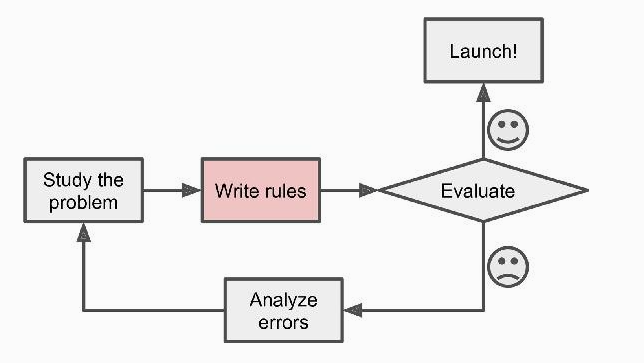

In [0]:
print("traditionnal  approach")
Image(filename='assets_ml/img/trad-approach.png',width=400)

machin learning approach


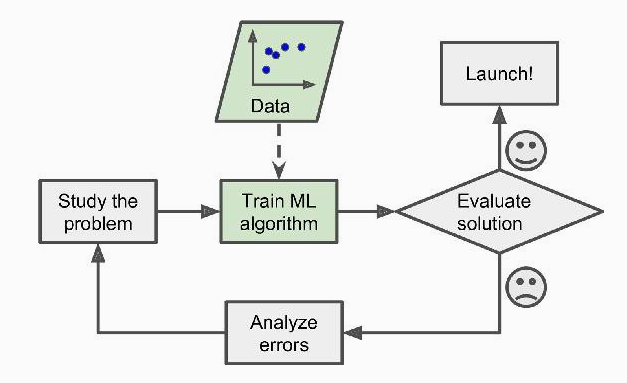

In [0]:
print("machin learning approach")
Image(filename='assets_ml/img/ml-approach.png',width=400)

Autre exemple: la reconnaissance vocale. Vous pouvez analyser les parolles de façon très experte: avec des spectrogrammes par exemple. Mais vous ne pourrez pas en déduire un algo qui marche pour tous les locuteurs, pour tous les mots.  

Il vaut mieux écrire un programme qui apprendra tout seul à partir des données. 


On qualifie souvent les algorithmes de ML de boites noires. Mais elles peuvent au final aider l'humain: En analysant les sorties des algo entrainés, on peut découvrir des phénoménes, des corrélations, des tendances qui échapent à l'expert. C'est le data mining. 



Pour résumé: le machine learning c'est cool pour: 

* Des problèmes dont les solutions nécessitent un grand nombre de régles.
* Les problèmes pour lesquels il n'y a pas de solutions traditionelles.
* Les environements fluctuants. Le machine learning peut s'adapter. 
* Avoir des intuitions sur des problèmes complexes et de grosses quantités de données.

### Les différents types de machine learning

On peut classer les algos de ML selon :

* S'ils sont entrainés avec la supervision d'un humain (supervised, unsupervised, semisupervised, and Reinforcement Learning)
* s'ils peuvent apprendre tout le long de leur vie (online versus batch learning)
* S'ils fonctionnent simplement en comparant des données (bêtement), ou si au contraire ils se basent sur un "modèle" (instance-based versus model-based learning)


Par exemple l'état de l'art des filtres à spam sont supervisés, ils apprennent en continue et ils sont basés sur des modèles. 

Détaillons ces critères.


## supervisé / non supervisé / semi supervisé / apprentissage par renforcement









### Supervisé

Les données qui nourissent les algos inclues la solution désirée, appelée "étiquette" (label). Exemple: on utilisent des mails avec les étiquettes spam/non-spam. 

Souvent les étiquettes sont mises manuellements. Mais on peut aussi utiliser d'autres programmes pour le faire. 


Il y a 2 grandes familles de problèmes supervisés: 

* La classification: les étiquettes sont qualitatives. ex: filtre de spam. 
* La regression: les étiquettes sont quantitatives, exemple: à partir des caractérisitque d'une voiture  (années de fabrication,  état d'usure), vous voulez prédire le prix. 



Classification


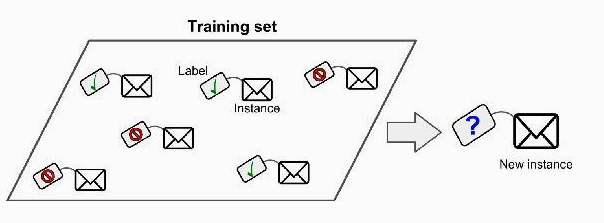

In [0]:
print("Classification")
Image("assets_ml/img/classification-intro.png")

Regression


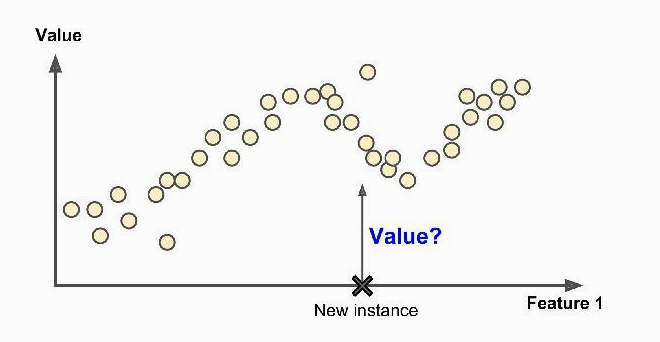

In [0]:
print("Regression")
Image("assets_ml/img/regression-intro.png")


Voici les algos les plus important d'apprentissage supervisé:

* k-plus proches voisins (k-Nearest Neighbors, KNN)
* Regression linéaire (Linear Regression)
* Regression logistique (Logistic Regression) aussi appelée regression softmax
*  Les machines à support vecteur (Support Vector Machines, SVMs)
* Abres de decisions et forêts aléatoires (Decision Trees and Random Forests)
* Réseaux de neurones (Neural networks). Comme ils sont souvent profond, on parle de deeplearning. 


Attention, malgré son nom, la regression logistique est un algo de classification. En fait on fait prédit (=on regresse) des probabilités sur chacune des classes.


###  Apprentissage non-supervisé. 

Les données ne sont pas étiquetés. Le système essaye d'apprendre sans indications. Voici les principaux algos: 

* Clustering
    * k-Means
    * Classification ascendante/descendante hiérarchique. (Hierarchical Cluster Analysis , HCA)
    * Les algos EM (Expectation Maximization)
* Visualisation et réduction de dimension
    * Analyse en composante principale (Principal Component Analysis, PCA)
    * Méthode à noyaux (Kernel PCA)
    * t-distributed Stochastic Neighbor Embedding (t-SNE)
* Association rule learning 
    * Apriori
    * Eclat

Par exemple, a partir des stats de visite d'un site internet. Un algos de clustering (e.g knn) peut 
 indiquer que 40% de vos visiteur sont des hommes qui aiment les BD, et que 20% sont de jeunes amateurs de SF. La classification hiérarchique, peut sub-diviser ces grands groupes en créant des sous-groupes. 





clustering


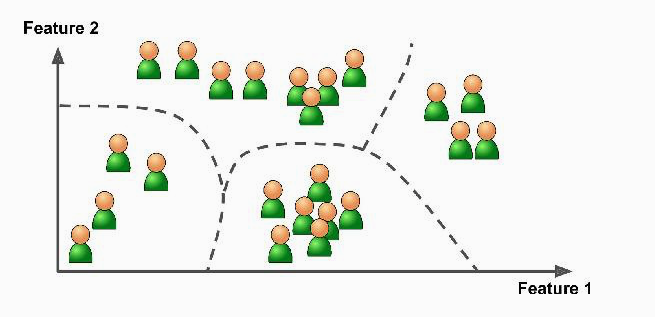

In [0]:
print("clustering")
Image("assets_ml/img/clustering-intro.png")

Les algos de visualisation permette de projeter des donnée en 2D ou 3D en préservant au mieux la structure des données. 

D'autres algos réduisent la dimension: Une manière de faire et de supprimer les variables qui sont très corrélée (ex: l'age d'un véhicule et sont kilometrage). 

***Astuce:*** C'est souvent une bonne idée de réduire la dimension des données avant de faire tourner les autres algos de machine learning. Cela va plus vite, mais aussi, cela peut mieux marcher en supprimant des détails inutils. Mais attention, ce n'est pas toujours le cas. Les réseaux de neurones par exemple, sont très fort pour trouver des infos interessantes dans les détails: ex la "texture" dans une image.  


Une tache que l'on demande souvent aux algos non supervisé c'est la détection d'anomalie: transaction financière frauduleuse, bizarie dans le fonctionnement d'un serveur (en analysant les logs)



###  Apprentissage semi-supervisé

Certains algos se débrouillent avec des données partiellement étiquetées. Par exemple les algos qui détectent les visages dans vos albums photos. Vous  les aider juste un peu en étiquetant quelques visages. 



### Apprentissage par renforcement


Le programme (appelé agent) peut observer son environement, sélectionner des actions et obteninr des récompenses ou des pénalités en fonction du résultat obtenu. L'agent peut apprendre par lui même quel est la meilleur stratégie pour obtenir le maximum de récompense. C'est la manière d'entrainer de nombreux bot, notamment le fameux AlphaGo de deepmind.  

Notons qu'il s'agit d'une sorte de méta-algorithme, et que les sous-algos peuvent comporter par exemple, des réseaux de neurones. 

## Par paquet (batch) et  en continu (online)



### Apprentissage par paquet

C'est le cas des réseaux de neurone "classiques": ils doivent être entrainés sur une grande quantité de données, et ils sont gourmants en  resources informatiques. L'entrainement est donc fait "offline". En phase de production (ou de test), on utilise un système figé, qui n'apprend plus, mais qui va aussi beaucoup plus vite. 

Si  de nouvelles données arrivent, pour les utiliser, vous devez débrancher (ou cloner) votre réseau de neurone pour refaire un apprentissage. 

### Apprentissage en continu

Le système apprend de manière incrémentale, tout le long de sa vie. C'est par exemple le cas des chat-bots qui apprennent en discutant avec les internotes. 

Le danger, c'est que les données entrantes peuvent être de mauvaises qualités, et détériorer l'apprentissage passé. 

Ex 1: en mars 2016, microsolft a branché un chatbot nomé 'Tay' sur twitter. Il a du être débranché après seulement 16 heures de services, car des utilisateur malintentionné, en l'abrevant de mauvais twits, avaient réussi à faire tenir à Tay des propos raciste et misogyne. 

Ex2: BabyQ et XiaoBing, des chatbots tournant sur les messagerie chinoises, on fini par critiqué le régime en place, et ils ont du être "reconditionnée". 




## Instance ou modèle

Une autre manière de différentier les systèmes de machine learning, et de voir comment ils se **généralisent**: à partir d'un certain nombre d'exemple d'entrainement, le système doit être capable de faire des prédictions sur des exemples qu'il n'a jamais vu. 

Il y a deux principales approche de généralisation: celle basée sur les instances, et celle sur les modèles. 




### Apprentissage basé sur les instances 


Pour programme un filtre de spam, vous pouvez utiliser la technique des k-plus-proches voisin: Vous fixez une mesure de similarités entre email (ex: le nombre de mot en commun). Quand un nouvel email (une nouvelle instance) arrive, vous regardez les k-emails les proches de cette instance dans la base de donnée d'apprentissage. Si il y a une majorité de voisin avec l'étiquette "spam", vous déclarer que la nouvelle instance est un spam. 


instance based


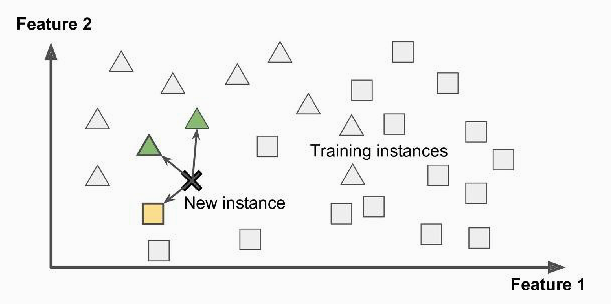

In [0]:
print("instance based")
Image("assets_ml/img/instance-based.png")

###   Apprentissage basé sur un modèle. 

L'autre idée est de penser à un modèle : c'est une description théorique de ce que vous visez. Cette description contient des paramètres d'ajustement qui seront fixés à partir des exemples de la base d'apprentissage (base 'train'). 

Comme la majorité des modèles sont construit à parir de paramètre, on parle de modèle 'paramétrique'. 
* En 1d, un modèle linéaire a 2 paramètres: la pente et le biais. 
* La technique des plus proches voisins est 'non paramétrique'. 

model based


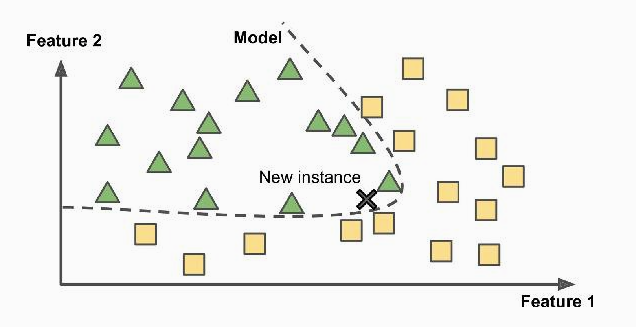

In [0]:
print("model based")
Image("assets_ml/img/model-based.png")

## L'argent fait-il le bonheur

Voici un exemple de modèle. 

On aimerait savoir si l'argent fait le bonheur, pour cela on va croiser deux jeux de données: 

* [Better Life Index](https://stats.oecd.org/index.aspx?DataSetCode=BLI): c'est des indices de "bien-être" de l'OECD (Organisation for Economic Co-operation and Development). 

*  [PIB par habitant (GDP per capita)]( http://goo.gl/j1MSKe) du FMI  (IMF,International Monetary Found) qui est une donnée purement économique.



### Observons les données

In [0]:
def load_all_data():
    df_full=pd.read_csv("assets_ml/dataframe/df_full.csv")
    df_full.set_index("Country",inplace=True)
    
    df_sample=pd.read_csv("assets_ml/dataframe/df_sample.csv")
    df_sample.set_index("Country",inplace=True)
    
    df_missing=pd.read_csv("assets_ml/dataframe/df_missing.csv")
    df_missing.set_index("Country",inplace=True)
    
    return df_full,df_sample,df_missing

_,df_sample,_=load_all_data()


"numpy extraction"
x_sample=df_sample["GDP per capita"]
X_sample_ext= np.stack([np.ones_like(x_sample),x_sample],axis=1) 
y_sample = df_sample["Life satisfaction"].values
print("x_sample.shape:",x_sample.shape)
print("X_sample_ext.shape",X_sample_ext.shape)
print("y_sample.shape",y_sample.shape)


"some very simple test data: points regularly spaced on a given interval"
xlim=60000
x_test=np.linspace(0, xlim, 1000)

x_sample.shape: (29,)
X_sample_ext.shape (29, 2)
y_sample.shape (29,)


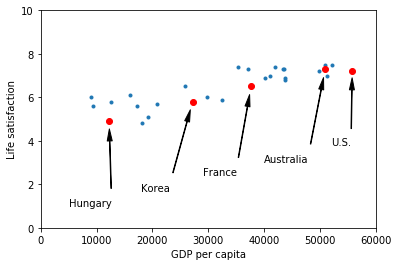

In [0]:
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

#variante en utilisant le plot de pandas
#df_sample.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))


position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = df_sample.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

Dans ce graphique, il semble y avoir une tendance (=trend). Les l'indice de satisfaction semble être une fonction croissante et linéaire du PIB par habitant, fonction auquel s'ajoute un bruit. 

Dans toute la suite on notera:
* $X$=GDP per capita
* $Y$=Life statisfaction
* $\hat Y$= une estimation de la Life statisfaction


On va estimer notre output selon le modèle suivant:
$$
\hat Y = w_0 + w_1 X 
$$



### Ajustons le modèle

Il faut trouver les meilleurs paramètres $w_0$ et $w_1$ 

In [0]:
from sklearn import linear_model

model_lin_sample = linear_model.LinearRegression(fit_intercept=False)
model_lin_sample.fit(X_sample_ext, y_sample)

"les 2 paramètres de la droite affine"
w0, w1=model_lin_sample.coef_[0],model_lin_sample.coef_[1]
print("w0:%.2f"%w0,", w1:%.2E"%w1)


w0:4.85 , w1:4.91E-05


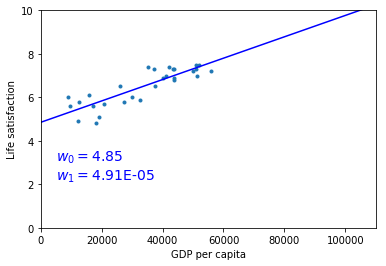

In [0]:
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

plt.plot(x_test, w0 + w1*x_test, "b")

plt.text(5000, 3.1, r"$w_0=$"+"%.2f"%w0, fontsize=14, color="b")
plt.text(5000, 2.2, r"$w_1=$"+"%.2E"%w1, fontsize=14, color="b");

Le modèle s'ajuste au mieux aux données train.  

### Prédiction

Imaginons que nous voulons savoir si les Chypriotes sont heureux. Malheureusement, l'OCDE n'a pas de "Life satisfacion" pour ce pays. Par contre le FMI nous donne le PIB par habitant: \$22,587. On peut alors appliquer notre modèle:


In [0]:
cyprus_gdp = 22587
print("cyprus gdp per capita:",cyprus_gdp)
cyprus_life_hat = model_lin_sample.predict([[1,cyprus_gdp]])
print("prediction of cyprus life satisfaction:",cyprus_life_hat)

cyprus gdp per capita: 22587
prediction of cyprus life satisfaction: [5.96242338]


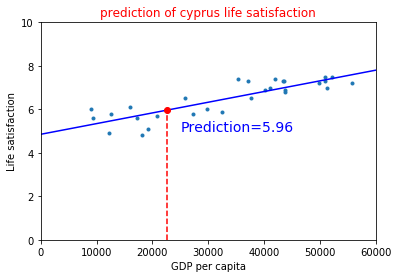

In [0]:
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

a=np.linspace(0, xlim, 1000)
plt.plot(a, w0 + w1*a, "b")

plt.title("prediction of cyprus life satisfaction",color="r")
plt.plot([cyprus_gdp, cyprus_gdp], [0, cyprus_life_hat], "r--")
plt.text(25000, 5.0, "Prediction=%.2f"%cyprus_life_hat, fontsize=14, color="b")
plt.plot(cyprus_gdp, cyprus_life_hat, "ro");


En résumé:

* On étudie les données
* On sélectionne un modèle
* On entraine (=ajuste) un modèle sur des données train
* On applique ce modèle pour faire des prédictions en espérant que notre modèle se généralise bien. 

C'est le plan typique d'un projet de machine learning. 

##  Des problèmes à cause des données

###  Des données en quantité insuffisante

Un enfant peut apprendre ce qu'est une pomme en observant quelques exemples de pommes. On pourra ensuite lui montrer toutes sortes de pommes, de couleur et de formes variées, il reconnaitra toujours une pomme. Génial! 

Les machine learning ne fonctionne pas aussi bien. Il faut des milliers de données pour un problème simple. Pour un problème complexe, comme de la reconnaissance d'image ou de parole, il faut même des millions d'exemples (à moins que vous ne ré-utilisiez un modèle déjà pré-entrainé). 



###  The unreasonable effetiveness of data

In a famous paper published in 2001, Microsoft researchers Michele Banko and Eric Brill showed that very different Machine Learning algorithms, including fairly simple ones, performed almost identically well on a complex problem of natural language disambiguation8 once they were given enough data. As the authors put it: “these results suggest that we may want to reconsider the trade-off between spending time and money on algorithm development versus spending it on corpus development.  The idea that data matters more than algorithms for complex problems was further popularized by Peter Norvig et al. in a paper titled “The Unreasonable Effectiveness of Data” published in 2009.10 It should be  noted, however, that small- and medium-sized datasets are still very common, and it is not always easy or cheap to get extra training data, so don’t abandon algorithms just yet. 




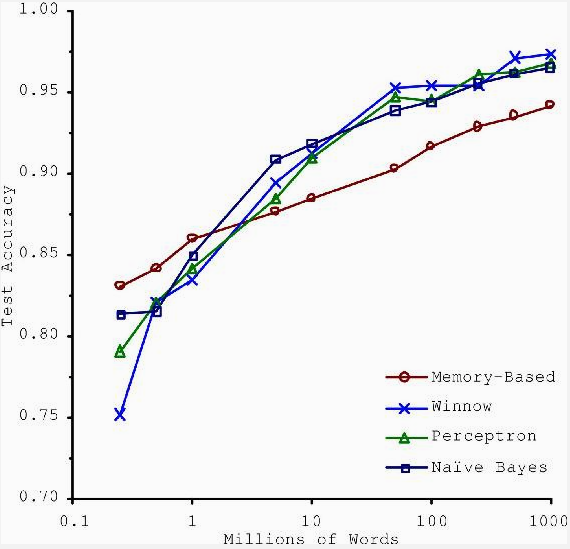

In [0]:
Image("assets_ml/img/unreasonable.png",width=300)

### Des données non représentatives

Ajoutons quelques pays: 


In [0]:
df_full,df_sample,df_missing=load_all_data()

"numpy extraction"
x_sample = df_sample["GDP per capita"].values
X_sample_ext= np.stack([np.ones_like(x_sample),x_sample],axis=1) 
y_sample = df_sample["Life satisfaction"].values

"numpy extraction"
x_full = df_full["GDP per capita"].values
X_full_ext = np.stack([np.ones_like(x_full),x_full],axis=1) 
y_full = df_full["Life satisfaction"].values

"some very simple test data: points regularly spaced on a given interval"
xlim=110000
x_test=np.linspace(0, xlim, 1000)

df_missing

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [0]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

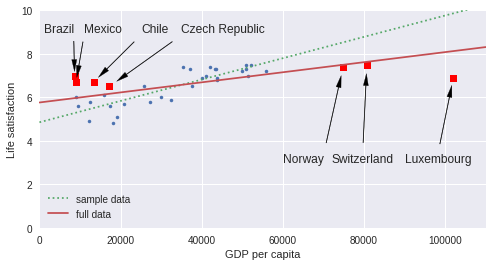

In [0]:
plt.figure(figsize=(8,4))
plt.plot(x_sample,y_sample,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = df_missing.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")
    

def fit_and_plot_lin_model(X,y):    
    model = linear_model.LinearRegression(fit_intercept=False)
    model.fit(X, y)
    w0, w1=model.coef_[0],model.coef_[1]
    return w0,w1
    
    
w0_sample,w1_sample=fit_and_plot_lin_model(X_sample_ext,y_sample)
w0_full,w1_full=fit_and_plot_lin_model(X_full_ext,y_full)

plt.plot(x_test, w0_sample + w1_sample*x_test,":",label="sample data")
plt.plot(x_test, w0_full + w1_full*x_test,label="full data")
plt.legend(loc=3);



Comme on peut le voir, cela détériore le modèle. Dans les pays très riches, les habitants ne sont pas aussi heureux que le prédisait le premier modèle. Et il y a aussi des exceptions dans les pays pauvres. 

Il est crutial d'utiliser un jeu train qui est représentatif de tout les cas que l'on veut généraliser, et ce n'est pas facile: 

* si le jeu est trop petit, on a forcément un "bruit d'échantillonage" (sampling noise). Ex: pas de chance, en choisissant au hasard des étudiants dans une classe, on n'a tirer que des étudidiants de petites tailles. 
* Mais un grand jeu de donnée peut aussi être non représentatif: cela arrive quand la méthode d'échantillonage est mauvaise. C'est ce qu'on appeblle de biais d'échantillongage (sampling bias).   






### A famous example of sampling bias

Perhaps the most famous example of sampling bias happened during the US presidential election in 1936, which pitted Landon against Roosevelt: the Literary Digest conducted a very large poll, sending mail to about 10 million people. It got 2.4 million answers, and predicted with high confidence that Landon would get 57% of the votes. Instead, Roosevelt won  with 62% of the votes. The flaw was in the Literary Digest’s sampling method:

* First, to obtain the addresses to send the polls to, the Literary Digest used telephone directories, lists of magazine subscribers, club membership lists, and the like. All of these lists tend to favor wealthier people, who are more likely to vote Republican (hence Landon).
* Second, less than 25% of the people who received the poll answered. Again, this introduces a sampling bias, by ruling out people who don’t care much about politics, people who don’t like the Literary Digest, and other key groups. This is a special type of sampling bias called nonresponse bias. 





### Bien préparer les données

Si vos données train ont beaucoup:
* de valeur abhérentes (=outliers=valeurs exceptionnelle)
* d'erreur (valeur fausses)
* de bruit (mesures imprécisent)
le système aura du mal à les synthétiser. 

Il faut donc passer beaucoup de temps à préparer les données.
Parmis les étapes de préparation, il y a la modification des variables descriptives. Voici les outils dont on dispose: 

* Sélection de variables: supprimer les variables inutiles.
* modification de variables: 
    * créer des catégories qui ont du sens (exemple: riche/pauvre à partir d'un revenu). 
    * Supprimer les outliers.
    * changer l'échelle, passer au log ...
* Création de variables: combiner plusieurs variable pour en créer des nouvelles (des variable d'interaction)
    *  exemple 1: en multipliant la variables binaire "1=riche"/"0=pauvre" par la variable binaire "1=citadain"/"0=campagnart"  on crée une variable quie détecte les riches citadains.
    * en divisant la variable "prix-d'appartement", par la variable "superficie", on crée une variable intéressante

## Problèmes d'algo

###  Sur-apprentissage (sur-ajustement, overfitting)


En ajustant trop un modèle aux données train, ce modèle ne pourra pas se généraliser à d'autres données. 

Reprenons notre problème de modèlisation de la Life-satisfaction. Voici un modèle qui pourrait parfaitement s'adapter aux données train: 
$$
\hat Y = f_w(X) = w_0 +w_1 X+ w_2 X^2 + ... + w_{20} X^{20}
$$
On ajuste ce modèles, c'est a dire, on trouve les coefficients $w$ qui minimisent 
$$
\sum_{i \in train} dist\big(Y_i,f_w(X_i)\big)
$$



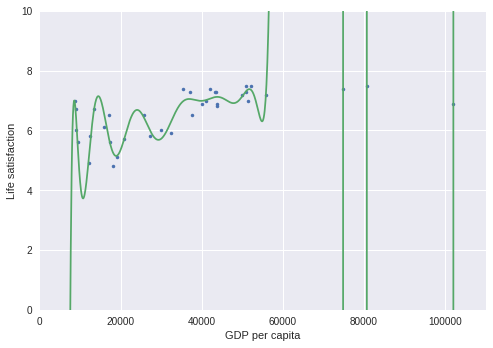

In [0]:
"we rename our full-data to make them shorter"
x=x_full
X=x[:,np.newaxis]
y=y_full

plt.plot(x,y,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler),('lin',lin_reg2)])
pipeline_reg.fit(X, y) 
y_test_hat = pipeline_reg.predict(x_test[:,np.newaxis])

plt.plot(x_test,y_test_hat);

Mais peut-on avoir confiance en un tel modèle pour prédire?



Des modèles complexes, comme les réseaux de neurones profonds, peuvent détecter des motifs subtils dans les données train, mais si ces motifs proviennent du bruit (ex: bruit d'échantillonnage) ce n'est pas bon. 


Par exemple, dans notre modèle de life-satisfaction, on pourrait ajouté des variables non-informative comme le nom du pays. Le réseau de neurone pourrait détecteur que tous les pays du jeu train qui ont un 'w' dans leur nom, ont une life-satisfaction supérieur à 7:

* New Zealand (7.3)
* Norway (7.4)
* Sweden (7.2)
* Switzerland (7.5)

Mais ensuite, quand on appliquerait notre modèle au Rwanda ou au Zimbabwe ... 


### Contraindre un modèle par la régularisation

L'overfitting vient quand le modèle est trop complexe. Pour limiter cela, les solutions sont: 

* Sélectionner un modèle avec moins de paramétre: ex: un modèle linéaire plutôt qu'un modèle polynomial de haut degré. MAIS: on risque de tomber dans le sous-ajustement. 
* Supprimer des descripteurs inutiles. MAIS pas facile à savoir à l'avance. 
* Augmenter le nombre de données train. MAIS en général on utilise toutes les données dont on dispose. 
* Bien nettoyer ses données. MAIS on l'a déjà fait car on est sérieux. 


Il existe une solution supplémentaire: la pénalisation: On garde un modèle avec beaucoup de paramètre, mais on oblige les paramètres à être assez petit. Pour cela on va trouver le $w$ qui va minimiser 

$$
\sum_{i \in train} dist\big(Y_i,f_w(X_i)\big) + \alpha \|w\|
$$

$\alpha$ est un coef positif, et le plus souvent on chosi l'une des deux pénalité suivantes:

* $\|w\|= |w_1| + ...+ |w_{20}| $. On parle de pénalité lasso. 
* $\|w\|= (w_1)^2 + ...+ (w_{20})^2 $. On parle de pénalité ridge.

Ainsi on laisse beaucoup de degré de liberté au modèle, mais, lors de l'apprentissage, on lui demande de trouver le bon équilibre entre:

* le bon ajustement aux données train
* la simplicité

Cela aide à la généralisation. 
  





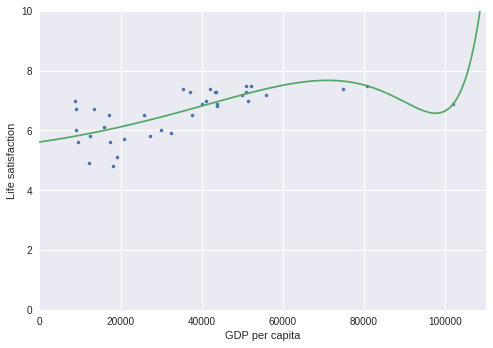

In [0]:
plt.plot(x,y,".")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(0, xlim)
plt.ylim(0,10)

poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
ridge = linear_model.Ridge(alpha=0.5)
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler),('lin',ridge)])
pipeline_reg.fit(X, y) 
y_test_hat = pipeline_reg.predict(x_test[:,np.newaxis])

plt.plot(x_test,y_test_hat);

### Hyper-paramètre 


* Les coefficients $w$ sont les paramètres du modèle. On dit aussi "learnable parameter".

* La quantité de régularisation $\alpha$ est un exemple d'hyper-paramètre.  


Les hyper-paramètres ne sont pas changés par les algorithmes d'apprentissages. 

Mais il faut bien ajuster leur valeur. On doit donc évaluer notre modèle avec plusieurs valeur d'hyper-paramètres, c'est l'étape de validation (voir plus loin). 




###  Sous-ajustement

C'est l'opposé sur sur-ajustement. Cela arrive quand le modèle est trop simplent pour apprendre la structure sous-jacente des données. C'est le cas du modèle affine pour la life-satisfaction. 

Quand cela arrive, les options sont: 
* Choisir un meilleurs modèle: plus flexible
* Sélectionner de meilleurs descripteurs
* Réduire le coefficient de pénalisation

##  Valider et tester


###  Erreur de généralisation

Pour vérifier qu'un modèle se généralise bien, il faut le tester sur de nouveaux cas. Il faut mieux faire cela avant de le mettre en production. 

Pour cela on découpe les données en deux partie: 
* train (souvent 80% des données)
* test

Et il ne faut surtout jamais utiliser le jeu test dans la phase d'entrainement du modèle.

Si l'erreur sur le jeu train est faible, mais que l'erreur sur jeu test est grande, c'est que le modèle sur-ajuste. 




### Validation

Comment choisir un hyper-paramètre comme $\alpha$. Une solution est d'essayer 100 valeurs différentes. Pour chacune des valeurs, vous entrainez un modèle avec le jeu train, puis vous mesurez l'erreur avec le jeu test. Vous sélectionnez ensuite le meilleurs $\alpha$. 

En faisant cela, vous avez commis une erreur: vous avez utiliser test pour construire le modèle.  

Pour éviter cette erreur, on peut séparer le jeu de données en trois parties disjointes:
* train
* validation
* test



### Cross validation


Pour éviter de gaspiller  des données train avec la validation, une technique très répandue est la cross-validation: vous découpez aléatoirement le jeu train en $n$ parties appelées folds. Ensuite vous entrainez et évaluez votre modèle $n$ fois, en évaluant le modèle sur une des folds, et en l'entrainant sur les $n-1$ autres. 







### Test final

Une fois que le modèle est sélectionné, que les hyper-paramètres sont fixés, on mesure l'erreur finale avec le jeu test. 

MAIS: que ce passe-t-il si on trouve cette erreur trop grande? En général on reprend son travail à zéro pour construire un meilleurs modèle. Et là encore on a fait une erreur: on utilise le jeu test a des fin de sélection de modèle... Personne n'est parfait. 



### No free lunch theorem

A model is a simplified version of the observations. The simplifications are meant to discard the superfluous details that are unlikely to generalize to new instances. However, to decide what data to discard and what data to keep, you must make assumptions. For example, a linear model makes the assumption that the data is fundamentally linear and that the distance between the instances and the straight line is just noise, which can safely   be ignored. In a famous 1996 paper David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. This is called the No Free Lunch (NFL) theorem. For some datasets the best model is a linear model, while for other datasets it is a neural network. There is no model that is a priori guaranteed to work better (hence the name of the theorem). The only way to know for sure which model is best is to evaluate them all. Since this is not possible, in practice you make some reasonable assumptions about the data and you evaluate only a few reasonable models. For example, for simple tasks you may evaluate linear models with various levels of regularization, and for a complex problem you may evaluate various neural networks.